In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import requests
import json
from pprint import pprint

import scipy.stats as stats
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
# https://www.scipy-lectures.org/packages/statistics/auto_examples/plot_regression_3d.html


# mult. linear regression https://stackoverflow.com/questions/11479064/multiple-linear-regression-in-python
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

#from census import Census

#Need api file



In [2]:
# import housing file
US_housing_file = "Housing Prices for US.csv"
US_housing_data = pd.read_csv(US_housing_file)
US_housing_data.head()

,DATE,MSPUS
0,1/1/1963,17800
1,4/1/1963,18000
2,7/1/1963,17900
3,10/1/1963,18500
4,1/1/1964,18500


In [3]:
US_housing= US_housing_data.rename(columns={"MSPUS":"Avg Home Price","DATE":"Date (Quarterly)"})
US_housing.head()

,Date (Quarterly),Avg Home Price
0,1/1/1963,17800
1,4/1/1963,18000
2,7/1/1963,17900
3,10/1/1963,18500
4,1/1/1964,18500


In [4]:
#Import data from FRED

# https://api.stlouisfed.org/fred/series/observations?series_id=GNPCA&api_key=abcdefghijklmnopqrstuvwxyz123456
FRED_url = "https://api.stlouisfed.org/fred/series/observations?series_id="

housing_US_seriesid = "MSPUS"
housing_south_seriesid = "ASPS"
housing_west_seriesid = "ASPW"
housing_northeast_seriesid = "ASPNE"
housing_midwest_seriesid = "ASPMW"

fedfund_seriesid = "FEDFUNDS"

#set the data frequency (d=daily,w=weekly,m=monthly,a=annually)
frequency = "a"

# How will data be summarized (avg, sum, eop=end of period, default is avg)
aggregation = "avg"

api_key = "fd8c22bb4ce3ecd6d465947f86b42594"

query_url_housing = f'{FRED_url}{housing_US_seriesid}&api_key={api_key}&file_type=json'
query_url_south = f'{FRED_url}{housing_south_seriesid}&api_key={api_key}&file_type=json'
query_url_west = f'{FRED_url}{housing_west_seriesid}&api_key={api_key}&file_type=json'
query_url_northeast = f'{FRED_url}{housing_northeast_seriesid}&api_key={api_key}&file_type=json'
query_url_midwest = f'{FRED_url}{housing_midwest_seriesid}&api_key={api_key}&file_type=json'

In [5]:
US_housing_response = requests.get(query_url_housing).json()
pprint(US_housing_response)

{'count': 223,
 'file_type': 'json',
 'limit': 100000,
 'observation_end': '9999-12-31',
 'observation_start': '1600-01-01',
 'observations': [{'date': '1963-01-01',
                   'realtime_end': '2018-11-09',
                   'realtime_start': '2018-11-09',
                   'value': '17800'},
                  {'date': '1963-04-01',
                   'realtime_end': '2018-11-09',
                   'realtime_start': '2018-11-09',
                   'value': '18000'},
                  {'date': '1963-07-01',
                   'realtime_end': '2018-11-09',
                   'realtime_start': '2018-11-09',
                   'value': '17900'},
                  {'date': '1963-10-01',
                   'realtime_end': '2018-11-09',
                   'realtime_start': '2018-11-09',
                   'value': '18500'},
                  {'date': '1964-01-01',
                   'realtime_end': '2018-11-09',
                   'realtime_start': '2018-11-09',
                  

In [6]:
US_housing_date=[]
US_housing_cost=[]

len(US_housing_response["observations"])

for observation in US_housing_response["observations"]:
    US_housing_date.append(observation["date"])
    US_housing_date_pd=pd.DataFrame(US_housing_date, columns=["Date"])
    US_housing_cost.append(observation["value"])
    US_housing_cost_pd=pd.DataFrame(US_housing_cost,columns=["Avg US Housing Cost"])

US_housing_df = pd.concat([US_housing_date_pd,US_housing_cost_pd], axis=1)
US_housing_df["Avg US Housing Cost"]=pd.to_numeric(US_housing_df["Avg US Housing Cost"])
US_housing_df.head()

,Date,Avg US Housing Cost
0,1963-01-01,17800.0
1,1963-04-01,18000.0
2,1963-07-01,17900.0
3,1963-10-01,18500.0
4,1964-01-01,18500.0


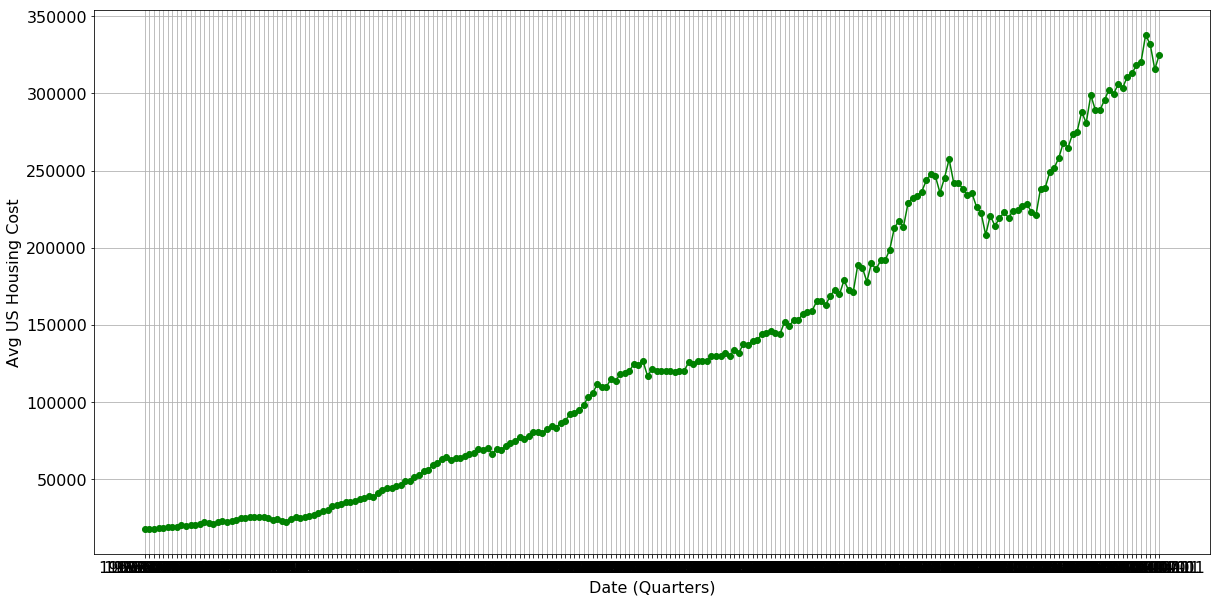

In [7]:
# plot graph of housing prices

plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

fig1, ax1 = plt.subplots()

ax1.set_xlabel("Date (Quarters)")
ax1.set_ylabel("Avg US Housing Cost")

data1 = US_housing_df["Avg US Housing Cost"]
x_axis1 = US_housing_df["Date"]

cost_trend = plt.plot(x_axis1,data1,color='g',marker = "o")

ax1.grid(True)
plt.show
plt.savefig("National Housing Prices Trend Chart - API")

In [8]:
# pull in region data 

south_housing_response = requests.get(query_url_south).json()
west_housing_response = requests.get(query_url_west).json()
northeast_housing_response = requests.get(query_url_northeast).json()
midwest_housing_response = requests.get(query_url_midwest).json()

In [9]:
# South DF
south_housing_date=[]
south_housing_cost=[]

for observation in south_housing_response["observations"]:
    south_housing_date.append(observation["date"])
    south_housing_date_pd=pd.DataFrame(south_housing_date, columns=["Date"])
    south_housing_cost.append(observation["value"])
    south_housing_cost_pd=pd.DataFrame(south_housing_cost,columns=["Avg South Region Housing Cost"])

south_housing_df = pd.concat([south_housing_date_pd,south_housing_cost_pd], axis=1)
south_housing_df["Avg South Region Housing Cost"]=pd.to_numeric(south_housing_df["Avg South Region Housing Cost"])
south_housing_df.head()

,Date,Avg South Region Housing Cost
0,1975-01-01,38000.0
1,1975-04-01,39800.0
2,1975-07-01,39200.0
3,1975-10-01,41300.0
4,1976-01-01,43000.0


In [10]:
# West DF
west_housing_date=[]
west_housing_cost=[]

for observation in west_housing_response["observations"]:
    west_housing_date.append(observation["date"])
    west_housing_date_pd=pd.DataFrame(west_housing_date, columns=["Date"])
    west_housing_cost.append(observation["value"])
    west_housing_cost_pd=pd.DataFrame(west_housing_cost,columns=["Avg West Region Housing Cost"])

west_housing_df = pd.concat([west_housing_date_pd,west_housing_cost_pd], axis=1)
west_housing_df["Avg West Region Housing Cost"]=pd.to_numeric(west_housing_df["Avg West Region Housing Cost"])
west_housing_df.head()

,Date,Avg West Region Housing Cost
0,1975-01-01,42300.0
1,1975-04-01,43600.0
2,1975-07-01,43600.0
3,1975-10-01,47400.0
4,1976-01-01,49200.0


In [49]:
# NE DF
ne_housing_date=[]
ne_housing_cost=[]

for observation in northeast_housing_response["observations"]:
    ne_housing_cost.append(observation["value"])
    ne_housing_cost_pd=pd.DataFrame(ne_housing_cost,columns=["Avg NE Region Housing Cost"])

ne_housing_df = pd.concat([west_housing_date_pd,ne_housing_cost_pd], axis=1)
ne_housing_df["Avg NE Region Housing Cost"]=pd.to_numeric(ne_housing_df["Avg NE Region Housing Cost"])
ne_housing_df.head()


,Date,Avg NE Region Housing Cost
0,1975-01-01,47300.0
1,1975-04-01,46400.0
2,1975-07-01,47400.0
3,1975-10-01,47700.0
4,1976-01-01,48600.0


In [12]:
# MW DF
mw_housing_date=[]
mw_housing_cost=[]

for observation in midwest_housing_response["observations"]:
    mw_housing_cost.append(observation["value"])
    mw_housing_cost_pd=pd.DataFrame(mw_housing_cost,columns=["Avg MW Region Housing Cost"])

mw_housing_df = pd.concat([west_housing_date_pd,mw_housing_cost_pd], axis=1)
mw_housing_df["Avg MW Region Housing Cost"]=pd.to_numeric(mw_housing_df["Avg MW Region Housing Cost"])
mw_housing_df.dtypes



Date                           object
Avg MW Region Housing Cost    float64
dtype: object

In [13]:
regional_housing2 = pd.merge(south_housing_df, west_housing_df, on="Date")
regional_housing3 = pd.merge(regional_housing2, mw_housing_df, on="Date")
regional_housing = pd.merge(regional_housing3, ne_housing_df, on="Date")
regional_housing.head()

,Date,Avg South Region Housing Cost,Avg West Region Housing Cost,Avg MW Region Housing Cost,Avg NE Region Housing Cost
0,1975-01-01,38000.0,42300.0,41800.0,42300.0
1,1975-04-01,39800.0,43600.0,44000.0,43600.0
2,1975-07-01,39200.0,43600.0,42900.0,43600.0
3,1975-10-01,41300.0,47400.0,44500.0,47400.0
4,1976-01-01,43000.0,49200.0,45100.0,49200.0


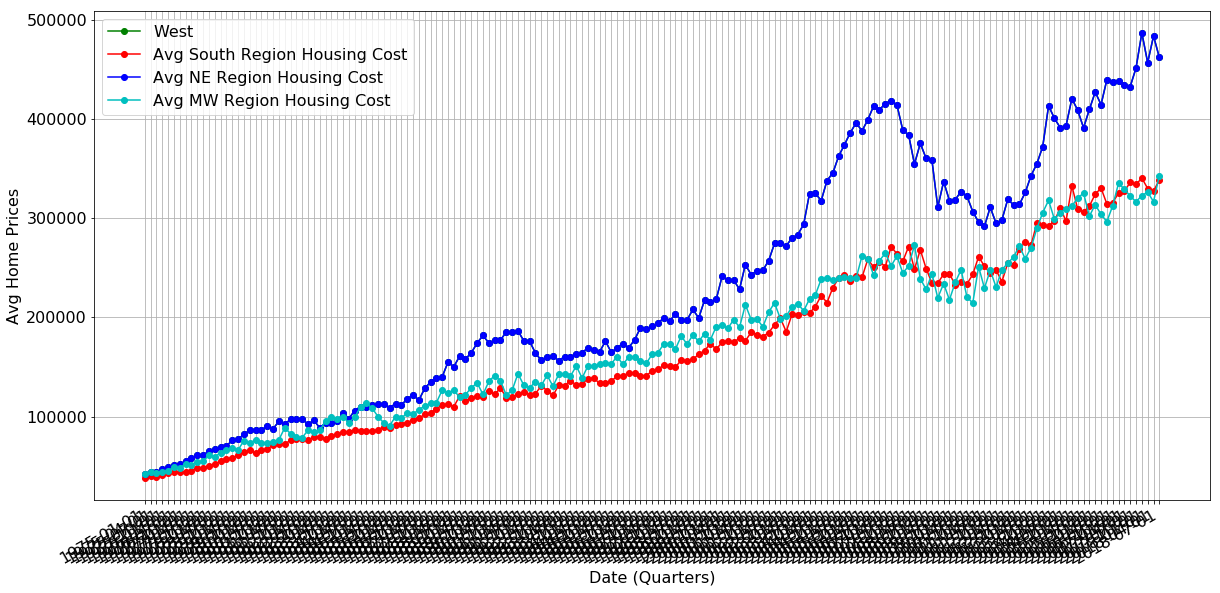

In [14]:
# plot graph of housing prices by region

fig2, ax2 = plt.subplots()

ax2.set_xlabel("Date (Quarters)")
ax2.set_ylabel("Avg Home Prices")

data_west = regional_housing["Avg West Region Housing Cost"]
data_south = regional_housing["Avg South Region Housing Cost"]
data_ne = regional_housing["Avg NE Region Housing Cost"]
data_mw = regional_housing["Avg MW Region Housing Cost"]

x_axis2 = regional_housing["Date"]

west_trend = plt.plot(x_axis2,data_west,color='g',marker = "o",label="West")
south_trend = plt.plot(x_axis2,data_south,color='r',marker = "o")
ne_trend = plt.plot(x_axis2,data_ne,color='b',marker = "o")
mw_trend = plt.plot(x_axis2,data_mw,color='c',marker = "o")


ax2.grid(True)
plt.legend(loc="best")
fig2.autofmt_xdate()
plt.show

plt.savefig("Regional Housing Prices Trend Chart - API")




In [15]:
# call data from csv

# import housing file
regional_housing_file = "Housing prices by region.csv"
regional_housing_data = pd.read_csv(regional_housing_file)
regional_housing_data.head()

,DATE,ASPNE,ASPMW,ASPW,ASPS
0,1/1/1975,47300,41800,42300,38000
1,4/1/1975,46400,44000,43600,39800
2,7/1/1975,47400,42900,43600,39200
3,10/1/1975,47700,44500,47400,41300
4,1/1/1976,48600,45100,49200,43000


In [16]:
regional_housing= regional_housing_data.rename(columns={"DATE":"Date (Quarterly)","ASPS":"South","ASPW":"West","ASPNE":"Northeast","ASPMW":"Midwest"})
regional_housing.head()

,Date (Quarterly),Northeast,Midwest,West,South
0,1/1/1975,47300,41800,42300,38000
1,4/1/1975,46400,44000,43600,39800
2,7/1/1975,47400,42900,43600,39200
3,10/1/1975,47700,44500,47400,41300
4,1/1/1976,48600,45100,49200,43000


In [17]:
# Perform the ANOVA
stats.f_oneway(regional_housing["West"], regional_housing["South"], regional_housing["Northeast"], regional_housing["Midwest"])

F_onewayResult(statistic=27.70093650654343, pvalue=6.249977134312744e-17)

In [18]:
regional_20yr = regional_housing.iloc[95:175,:]
regional_20yr.head()

regional_10yr = regional_housing.iloc[135:175,:]
regional_10yr.head()

,Date (Quarterly),Northeast,Midwest,West,South
135,10/1/2008,395100,243800,358400,234500
136,1/1/2009,370600,219600,311000,234500
137,4/1/2009,377300,234000,336900,243500
138,7/1/2009,437700,217700,317800,243800
139,10/1/2009,465800,235300,318800,232900


<function matplotlib.pyplot.show(*args, **kw)>

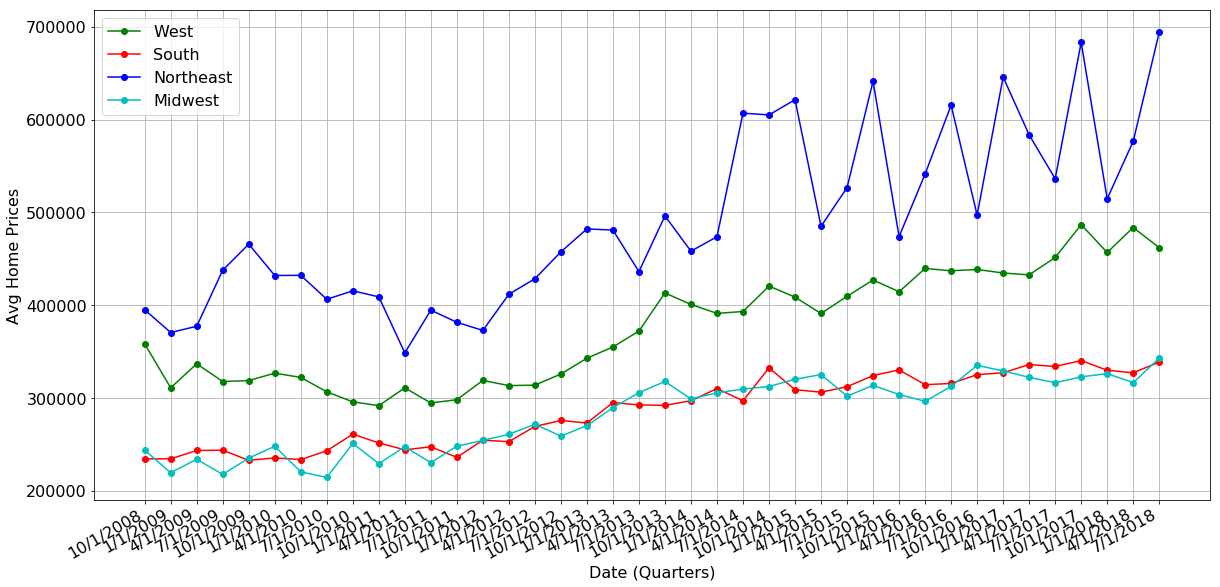

In [19]:
# plot graph of housing prices by region 10 Year

plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

fig4, ax4 = plt.subplots()

ax4.set_xlabel("Date (Quarters)")
ax4.set_ylabel("Avg Home Prices")

data_west = regional_10yr["West"]
data_south = regional_10yr["South"]
data_ne = regional_10yr["Northeast"]
data_mw = regional_10yr["Midwest"]

x_axis4 = regional_10yr["Date (Quarterly)"]

west_trend = plt.plot(x_axis4,data_west,color='g',marker = "o")
south_trend = plt.plot(x_axis4,data_south,color='r',marker = "o")
ne_trend = plt.plot(x_axis4,data_ne,color='b',marker = "o")
mw_trend = plt.plot(x_axis4,data_mw,color='c',marker = "o")

plt.legend(loc="best")

ax4.grid(True)
fig4.autofmt_xdate()
plt.show

In [20]:
# Perform the ANOVA 10 Yr
stats.f_oneway(regional_10yr["West"], regional_10yr["South"], regional_10yr["Northeast"], regional_10yr["Midwest"])

F_onewayResult(statistic=99.03914548430888, pvalue=6.161046559808874e-36)

In [21]:
# Perform the ANOVA 10 Yr (minus NE)
stats.f_oneway(regional_10yr["West"], regional_10yr["South"], regional_10yr["Midwest"])

F_onewayResult(statistic=50.46478221336024, pvalue=1.5753537397448586e-16)

In [22]:
# Perform the ANOVA 10 Yr (minus NE)
stats.f_oneway(regional_10yr["South"], regional_10yr["Midwest"])

F_onewayResult(statistic=0.24973257798687726, pvalue=0.618670266735535)

In [23]:
# import fed funds rate
fed_funds_file=pd.read_csv("FedFundsRateQuarterly.csv")


fed_funds=fed_funds_file.rename(columns={"DATE":"Date","FEDFUNDS":"Fed Funds Rate"})
fed_funds.head()


,Date,Fed Funds Rate
0,1975-01-01,6.303333
1,1975-04-01,5.420000
2,1975-07-01,6.160000
3,1975-10-01,5.413333
4,1976-01-01,4.826667


In [24]:
fed_funds_regional = pd.concat([regional_housing, fed_funds], axis=1)
fed_funds_regional.head()

,Date (Quarterly),Northeast,Midwest,West,South,Date,Fed Funds Rate
0,1/1/1975,47300,41800,42300,38000,1975-01-01,6.303333
1,4/1/1975,46400,44000,43600,39800,1975-04-01,5.420000
2,7/1/1975,47400,42900,43600,39200,1975-07-01,6.160000
3,10/1/1975,47700,44500,47400,41300,1975-10-01,5.413333
4,1/1/1976,48600,45100,49200,43000,1976-01-01,4.826667


In [26]:
# **********************     Fed funds against national data    ******************************************************

US_housing.head(50)
US_housing_reduced=US_housing.iloc[48:223,:]
US_housing_reduced2=US_housing_reduced.reset_index(drop=True)
US_housing_reduced2.head()

,Date (Quarterly),Avg Home Price
0,1/1/1975,38100
1,4/1/1975,39000
2,7/1/1975,38800
3,10/1/1975,41200
4,1/1/1976,42800


In [27]:
fed_funds.head()
fed_funds_nat=fed_funds["Fed Funds Rate"]
fed_funds_nat.head()

0    6.303333
1    5.420000
2    6.160000
3    5.413333
4    4.826667
Name: Fed Funds Rate, dtype: float64

In [28]:
fed_funds_nat = pd.concat([US_housing_reduced2, fed_funds], axis=1)
fed_funds_nat2=fed_funds_nat.drop(columns=["Date"])
fed_funds_nat2.head()

,Date (Quarterly),Avg Home Price,Fed Funds Rate
0,1/1/1975,38100,6.303333
1,4/1/1975,39000,5.420000
2,7/1/1975,38800,6.160000
3,10/1/1975,41200,5.413333
4,1/1/1976,42800,4.826667


In [29]:
fed_funds_nat2["Avg Home Price"].corr(fed_funds_nat2["Fed Funds Rate"])

-0.7582716414603708

<function matplotlib.pyplot.show(*args, **kw)>

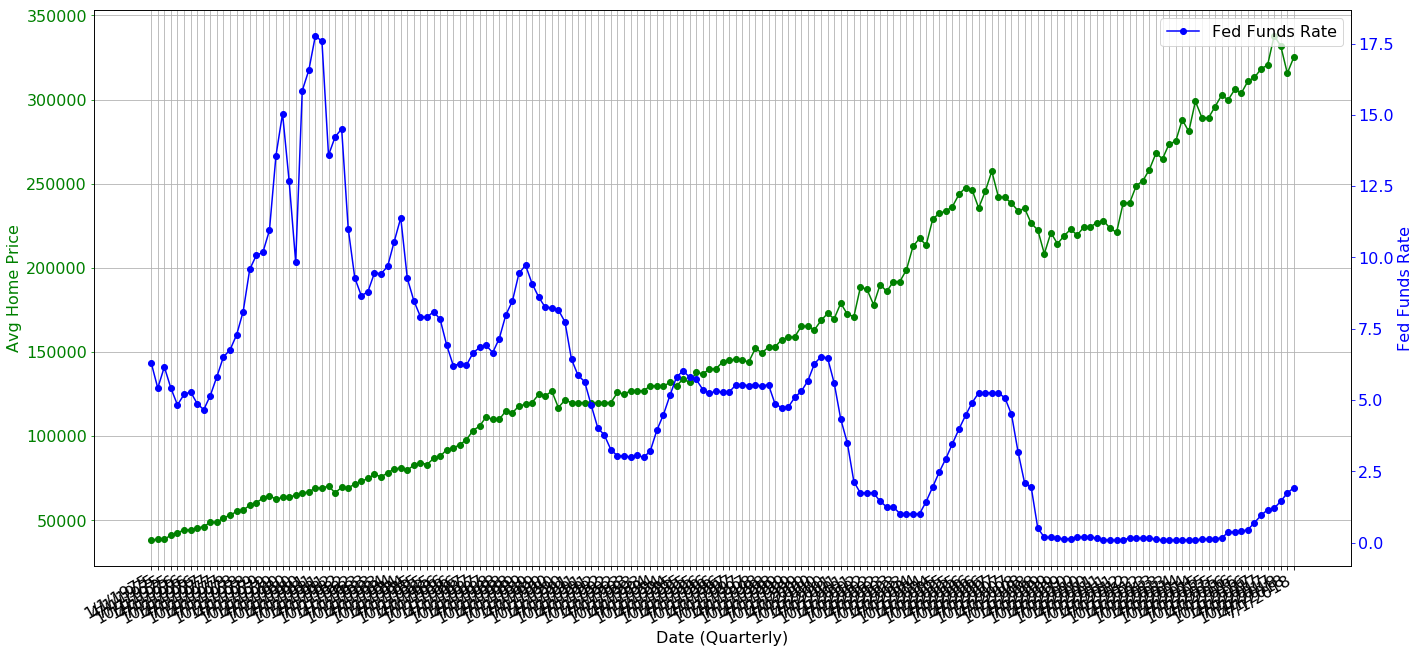

In [30]:
# plot graph of housing prices by region all years, QOQ changes against Fed Fund

plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

fig10, ax10 = plt.subplots()

x_axis_fed_nat = fed_funds_nat2["Date (Quarterly)"]
data_nat_fed = fed_funds_nat2["Avg Home Price"]
data_funds_fed = fed_funds_nat2["Fed Funds Rate"]

ax10.set_xlabel("Date (Quarterly)")
ax10.set_ylabel("QOQ Change in Price")
ax10.tick_params('y',colors='g')
ax10.set_ylabel("Avg Home Price", color='g')
Nat_home = plt.plot(x_axis_fed_nat,data_nat_fed,color='g',marker = "o")


ax11 = ax10.twinx()
ax11.set_ylabel("Fed Funds Rate",color='b')
ax11.tick_params('y',colors='b')
Nat_fed = plt.plot(x_axis_fed_nat,data_funds_fed,color='b',marker = "o")


plt.legend(loc="best")

fig10.tight_layout()
ax10.grid(True)
fig10.autofmt_xdate()
plt.show

In [31]:
# Also do values for 10 year but have to calculate a new mean
regional_Fed_Funds_10yr = fed_funds_regional.iloc[134:174,:]
regional_Fed_Funds_10yr.head()


,Date (Quarterly),Northeast,Midwest,West,South,Date,Fed Funds Rate
134,7/1/2008,484300,228100,360300,249200,2008-07-01,1.940000
135,10/1/2008,395100,243800,358400,234500,2008-10-01,0.506667
136,1/1/2009,370600,219600,311000,234500,2009-01-01,0.183333
137,4/1/2009,377300,234000,336900,243500,2009-04-01,0.180000
138,7/1/2009,437700,217700,317800,243800,2009-07-01,0.156667


In [32]:
# Multiple Linear Regression

#import file

mult_reg_file = pd.read_csv("Regression File.csv")

mult_reg_file.head()



,DATE,Housing NE,Housing MW,Housing W,Housing S,Housing NE Change QOQ,Housing MW Change QOQ,Housing W Change QOQ,Housing S Change QOQ,Housing NE Change QOQ (Norm),Housing MW Change QOQ (Norm),Housing W Change QOQ (Norm),Housing S Change QOQ (Norm),Fed Funds,Fed Funds Change QOQ,Fed Funds Change QOQ (Norm),Unemployment,UE QOQ Change,UE QOQ Change (Norm),Personal Income
0,1/1/75,47300.0,41800.0,42300.0,38000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.303333,NaN,NaN,8.3,NaN,NaN,NaN
1,4/1/75,46400.0,44000.0,43600.0,39800.0,-0.019027,0.052632,0.030733,0.047368,-0.038583,0.038886,0.015960,0.034082,5.420000,-0.140137,-0.153030,8.9,0.072581,0.075950,22982.0
2,7/1/75,47400.0,42900.0,43600.0,39200.0,0.021552,-0.025000,0.000000,-0.015075,0.001996,-0.038746,-0.014773,-0.028362,6.160000,0.136531,0.123639,8.5,-0.045113,-0.041744,22993.5
3,10/1/75,47700.0,44500.0,47400.0,41300.0,0.006329,0.037296,0.087156,0.053571,-0.013227,0.023550,0.072383,0.040285,5.413333,-0.121212,-0.134104,8.3,-0.019685,-0.016316,23005.0
4,1/1/76,48600.0,45100.0,49200.0,43000.0,0.018868,0.013483,0.037975,0.041162,-0.000688,-0.000263,0.023202,0.027876,4.826667,-0.108374,-0.121267,7.7,-0.068273,-0.064904,23016.5


In [33]:
# Remove first row
mult_reg_file = mult_reg_file.iloc[1:175,:]

#174 rows
mult_reg_file.head()

,DATE,Housing NE,Housing MW,Housing W,Housing S,Housing NE Change QOQ,Housing MW Change QOQ,Housing W Change QOQ,Housing S Change QOQ,Housing NE Change QOQ (Norm),Housing MW Change QOQ (Norm),Housing W Change QOQ (Norm),Housing S Change QOQ (Norm),Fed Funds,Fed Funds Change QOQ,Fed Funds Change QOQ (Norm),Unemployment,UE QOQ Change,UE QOQ Change (Norm),Personal Income
1,4/1/75,46400.0,44000.0,43600.0,39800.0,-0.019027,0.052632,0.030733,0.047368,-0.038583,0.038886,0.015960,0.034082,5.420000,-0.140137,-0.153030,8.9,0.072581,0.075950,22982.0
2,7/1/75,47400.0,42900.0,43600.0,39200.0,0.021552,-0.025000,0.000000,-0.015075,0.001996,-0.038746,-0.014773,-0.028362,6.160000,0.136531,0.123639,8.5,-0.045113,-0.041744,22993.5
3,10/1/75,47700.0,44500.0,47400.0,41300.0,0.006329,0.037296,0.087156,0.053571,-0.013227,0.023550,0.072383,0.040285,5.413333,-0.121212,-0.134104,8.3,-0.019685,-0.016316,23005.0
4,1/1/76,48600.0,45100.0,49200.0,43000.0,0.018868,0.013483,0.037975,0.041162,-0.000688,-0.000263,0.023202,0.027876,4.826667,-0.108374,-0.121267,7.7,-0.068273,-0.064904,23016.5
5,4/1/76,48100.0,49400.0,51600.0,43700.0,-0.010288,0.095344,0.048780,0.016279,-0.029844,0.081598,0.034008,0.002993,5.196667,0.076657,0.063765,7.6,-0.021552,-0.018183,23028.0


In [34]:
# **********************  Regression on price National  *****************************

In [35]:
price_inputs_raw=mult_reg_file[["Fed Funds","Unemployment"]]

price_input=price_inputs_raw
price_input.insert(0,"Intercept",1.000000)

price_input.head()


,Intercept,Fed Funds,Unemployment
1,1.0,5.420000,8.9
2,1.0,6.160000,8.5
3,1.0,5.413333,8.3
4,1.0,4.826667,7.7
5,1.0,5.196667,7.6


In [36]:
cost_output_nat=US_housing_reduced2["Avg Home Price"]
cost_output_nat2=pd.DataFrame(cost_output_nat)
cost_output_nat3 = cost_output_nat2.drop([0])
cost_output_nat3.head()

,Avg Home Price
1,39000
2,38800
3,41200
4,42800
5,44200


In [37]:
model = sm.OLS(cost_output_nat3, price_input)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Avg Home Price   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     163.6
Date:                Fri, 09 Nov 2018   Prob (F-statistic):           1.98e-40
Time:                        16:50:03   Log-Likelihood:                -2119.8
No. Observations:                 174   AIC:                             4246.
Df Residuals:                     171   BIC:                             4255.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3.247e+05   1.51e+04     21.480   

In [38]:

US_housing_reduced3=US_housing_reduced2.drop([0])
nat_plot = pd.concat([US_housing_reduced3,price_input],axis=1)
nat_plot.head()

,Date (Quarterly),Avg Home Price,Intercept,Fed Funds,Unemployment
1,4/1/1975,39000,1.0,5.420000,8.9
2,7/1/1975,38800,1.0,6.160000,8.5
3,10/1/1975,41200,1.0,5.413333,8.3
4,1/1/1976,42800,1.0,4.826667,7.7
5,4/1/1976,44200,1.0,5.196667,7.6


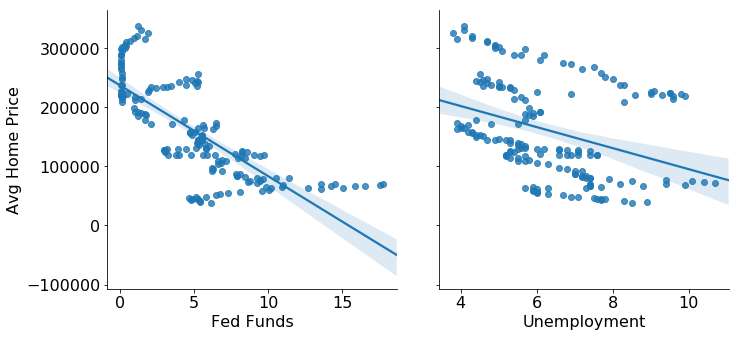

In [39]:
import seaborn as sns

price_inputs_ne_raw=nat_plot[["Avg Home Price","Fed Funds","Unemployment"]]
sns.pairplot(nat_plot, x_vars=["Fed Funds","Unemployment"],y_vars=["Avg Home Price"],size=5, kind="reg")

In [40]:
# --------------------------------------------------------------------------------------------

In [41]:
# ************************** Annual Analysis *******************



mult_reg_file2 = pd.read_csv("RegressionGraphAnnual.csv")

mult_reg_file2.head()

,DATE,Real Median Personal Income index,Fed Funds,Unemployment,US Housing Price index
0,1/1/74,100.00000,10.502500,5.641667,199.72299
1,1/1/75,98.10467,5.824167,8.475000,217.59003
2,1/1/76,98.30103,5.045000,7.700000,245.01385
3,1/1/77,99.04380,5.537500,7.050000,270.91413
4,1/1/78,98.22420,7.930833,6.066667,309.41828


In [42]:
reg_inputs_ann = mult_reg_file2[["Real Median Personal Income index","Fed Funds","Unemployment"]]

reg_outputs_ann=mult_reg_file2[["US Housing Price index"]]

reg_inputs_ann2 = reg_inputs_ann
reg_inputs_ann2.insert(0,"Intercept",1)
reg_inputs_ann_df = pd.DataFrame(reg_inputs_ann2)
reg_inputs_ann_df["Real Median Personal Income index"] = pd.to_numeric(reg_inputs_ann_df["Real Median Personal Income index"])
reg_inputs_ann_df.dtypes

Intercept                              int64
Real Median Personal Income index    float64
Fed Funds                            float64
Unemployment                         float64
dtype: object

In [43]:
model = sm.OLS(reg_outputs_ann, reg_inputs_ann_df)
results2 = model.fit()
print(results2.summary())



                              OLS Regression Results                              
Dep. Variable:     US Housing Price index   R-squared:                       0.858
Model:                                OLS   Adj. R-squared:                  0.847
Method:                     Least Squares   F-statistic:                     80.24
Date:                    Fri, 09 Nov 2018   Prob (F-statistic):           5.69e-17
Time:                            16:50:08   Log-Likelihood:                -287.58
No. Observations:                      44   AIC:                             583.2
Df Residuals:                          40   BIC:                             590.3
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [44]:
# Plot Regression

print('Parameters: ', results2.params)
print('Standard errors: ', results2.bse)
print('Predicted values: ', results2.predict())

Parameters:  Intercept                           -3108.116450
Real Median Personal Income index      32.082346
Fed Funds                              -7.575694
Unemployment                           54.795466
dtype: float64
Standard errors:  Intercept                            682.606510
Real Median Personal Income index      4.462168
Fed Funds                             12.752066
Unemployment                          24.144781
dtype: float64
Predicted values:  [ 329.69215588  459.58096358  429.31689464  413.79861657  315.49055792
  192.3425165   202.00671002  147.02331497  324.21079832  400.91760552
  365.87734698  432.54543566  530.87619273  531.02280712  592.13178993
  657.93203026  647.82315688  682.31750183  699.09969045  704.47052349
  693.69972623  749.46231677  819.77692306  954.17326055 1120.86918536
 1149.05945033 1170.28046078 1194.38200108 1238.84010813 1263.51626339
 1224.85330852 1240.26029908 1312.17346517 1327.82598367 1242.84477904
 1403.14389411 1363.31898918 1265.3

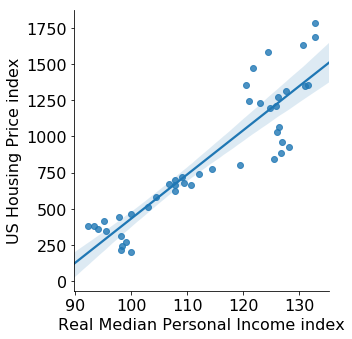

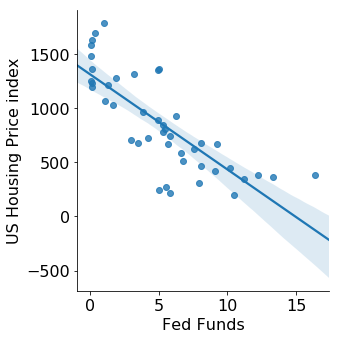

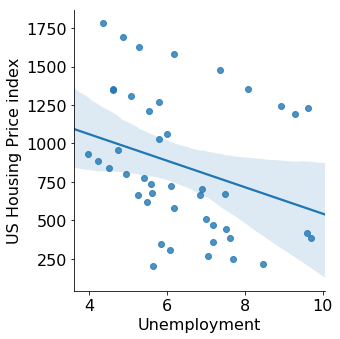

In [47]:
import seaborn as sns

sns.lmplot(x='Real Median Personal Income index',y='US Housing Price index',data=mult_reg_file2)
sns.lmplot(x='Fed Funds',y='US Housing Price index',data=mult_reg_file2)
sns.lmplot(x='Unemployment',y='US Housing Price index',data=mult_reg_file2)




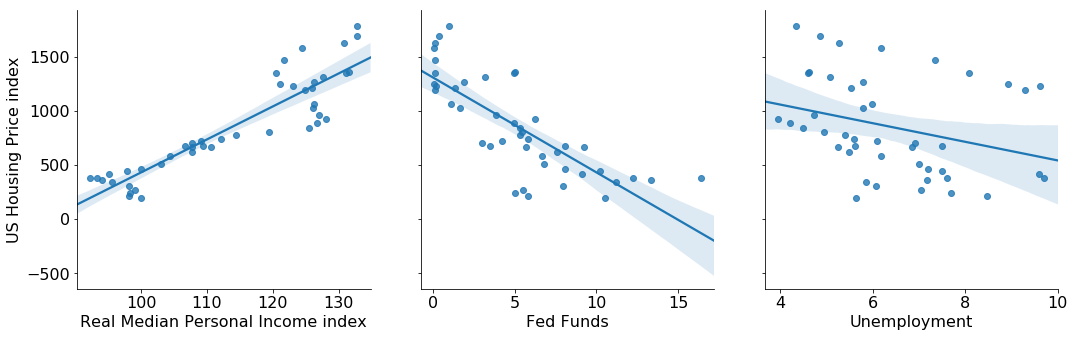

In [48]:

sns.pairplot(mult_reg_file2, x_vars=["Real Median Personal Income index","Fed Funds","Unemployment"],y_vars=["US Housing Price index"],size=5, kind="reg")